<a href="https://colab.research.google.com/github/akihikoichihara/Colab/blob/main/FlightRadar24competitionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ebae4651be77af75dd0c2c2a6de37f900e2f3104c864b0bdd9597537d6e64050
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


[WARN] 日本語フォントが見つかりませんでした。文字化けする場合は Noto Sans CJK JP などを導入してください。
[OK] 画像を書き出しました: 競合マトリクス.png / 競合マトリクス.svg


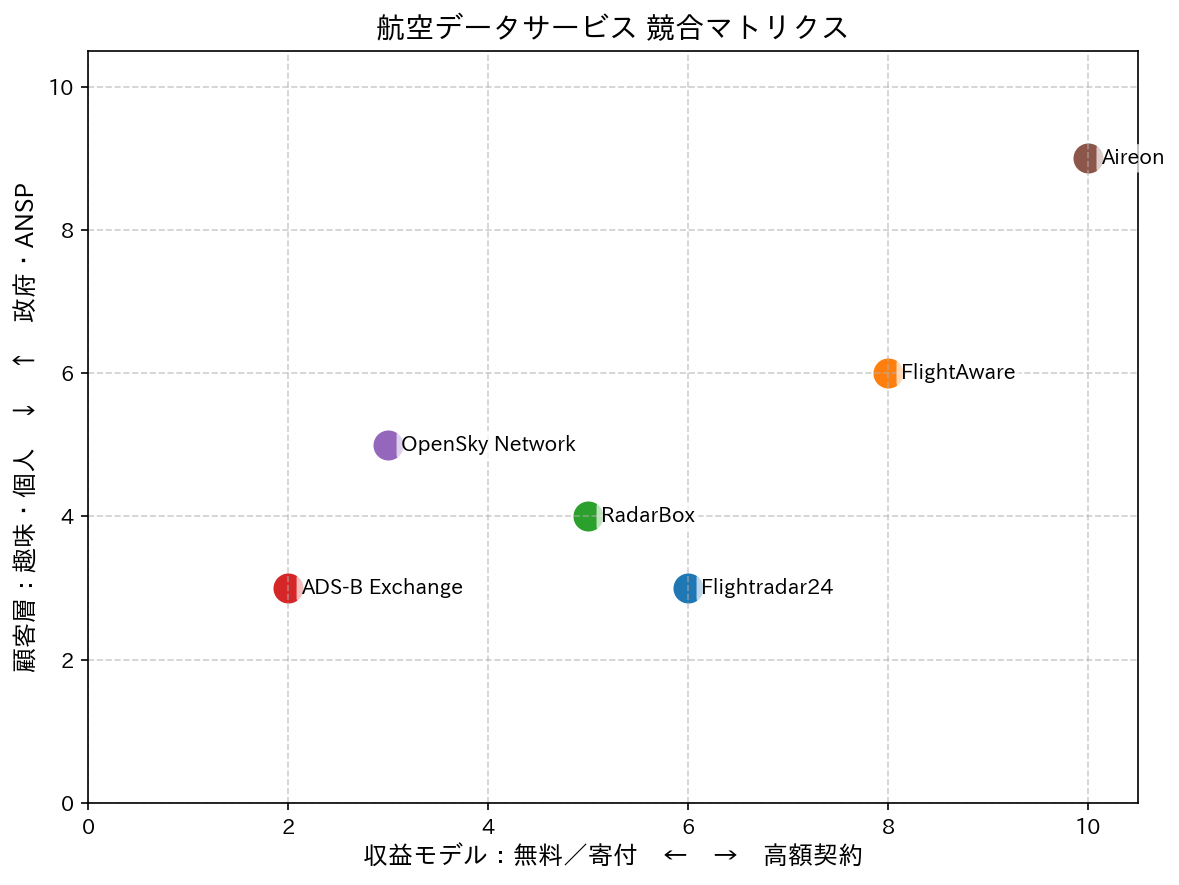

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# -*- coding: utf-8 -*-
"""
航空データサービス競合マトリクス作図スクリプト
- x軸: 収益モデル（左=無料/寄付 ←→ 右=高額契約）
- y軸: 顧客層   （下=趣味/個人   ←→ 上=政府・ANSP）
日本語フォントを自動検出し、見つかったフォントで描画します。
"""

import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path

# 1) 日本語フォント自動検出（見つかった最初のフォントを使用）
JP_FONT_CANDIDATES = [
    "Noto Sans CJK JP", "Noto Serif CJK JP", "Source Han Sans JP",
    "Source Han Serif JP", "Yu Gothic", "Yu Mincho",
    "Hiragino Sans", "Hiragino Kaku Gothic ProN",
    "Hiragino Mincho ProN", "Meiryo"
]

def pick_japanese_font(candidates=JP_FONT_CANDIDATES):
    available = {Path(f.fname).name: f.name for f in font_manager.fontManager.ttflist}
    # name / family の両方にヒットするか軽くチェック
    installed_names = [f.name for f in font_manager.fontManager.ttflist]
    for cand in candidates:
        if cand in installed_names:
            return cand
    # family名で見つからない場合は、ファイル名からの簡易チェック
    for cand in candidates:
        for f in font_manager.fontManager.ttflist:
            if cand.lower().replace(" ", "") in f.name.lower().replace(" ", ""):
                return f.name
    return None

jp_font = pick_japanese_font()
if jp_font:
    plt.rcParams["font.family"] = jp_font
    print(f"[INFO] 使用フォント: {jp_font}")
else:
    print("[WARN] 日本語フォントが見つかりませんでした。文字化けする場合は Noto Sans CJK JP などを導入してください。")

plt.rcParams["axes.unicode_minus"] = False  # マイナス記号の文字化け対策

# 2) 配置するサービス（必要に応じて調整してください）
#   スケール: x=[0..10], y=[0..10] くらいを想定
services = {
    "Flightradar24": (6.0, 3.0),
    "FlightAware": (8.0, 6.0),
    "RadarBox": (5.0, 4.0),
    "ADS-B Exchange": (2.0, 3.0),
    "OpenSky Network": (3.0, 5.0),
    "Aireon": (10.0, 9.0),
}

# 3) 図の作成
def draw_matrix(positions: dict, xlim=(0, 10.5), ylim=(0, 10.5),
                png_path="競合マトリクス.png", svg_path="競合マトリクス.svg"):

    fig = plt.figure(figsize=(8, 6), dpi=150)
    ax = fig.add_subplot(111)

    # 軸ラベル（日本語）
    ax.set_xlabel("収益モデル：無料／寄付　←　→　高額契約", fontsize=12)
    ax.set_ylabel("顧客層：趣味・個人　↓　↑　政府・ANSP", fontsize=12)
    ax.set_title("航空データサービス 競合マトリクス", fontsize=14)

    # 目安グリッド
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid(True, linestyle="--", alpha=0.6)

    # 象限の補助線（中央に引きたい場合はコメントアウト解除）
    # ax.axvline((xlim[0]+xlim[1])/2, color="gray", linestyle=":", linewidth=1, alpha=0.6)
    # ax.axhline((ylim[0]+ylim[1])/2, color="gray", linestyle=":", linewidth=1, alpha=0.6)

    # 散布とラベル
    for name, (x, y) in positions.items():
        ax.scatter(x, y, s=180)
        ax.annotate(
            name,
            (x, y),
            xytext=(6, 0), textcoords="offset points",
            va="center", fontsize=10,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
        )

    fig.tight_layout()
    fig.savefig(png_path, bbox_inches="tight")
    fig.savefig(svg_path, bbox_inches="tight")
    print(f"[OK] 画像を書き出しました: {png_path} / {svg_path}")

if __name__ == "__main__":
    draw_matrix(services)
